<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 5

In [ ]:
import requests
from requests.auth import HTTPBasicAuth

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

Por una cuestión de seguridad, tenemos la clave de la API guardada en Colab Secrets.

Para obtener su API Key de Alphacast tienen que generar un usuario y acceder a https://www.alphacast.io/settings

Después pueden dejar guardada su key en Colab Secrets, el Drive, o de alguna otra manera.

Alternativamente podrían bajar el DataSet y cargarlo a mano. También es posible acceder a estos datos directamente desde [INDEC](https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-9-48), pero esos datos no están estandarizados.

In [ ]:
from google.colab import userdata

# Definir user key para la API
user_key = userdata.get('ALPHACAST')

Traemos los datos que necesitamos

In [ ]:
# EMAE (Estimador Mensual de Actividad Económica) es publicado por el INDEC mensualmente
#y refleja la evolución de la actividad económica del conjunto de los sectores productivos a nivel nacional.
#Este indicador permite anticipar las tasas de variación del Producto Interno Bruto (PIB) trimestral
emae = requests.get('https://api.alphacast.io/datasets/5331/data?apiKey='+user_key+'&&$format=csv', auth=HTTPBasicAuth(user_key, ''))
open('emae.csv','wb').write(emae.content)
emae = pd.read_csv('emae.csv',delimiter = ',')

In [ ]:
emae['Date'] = pd.to_datetime(emae['Date'])
emae.set_index('Date', inplace = True)
emae = emae.loc['2004-01-01':]

Preparamos una función para graficar

In [ ]:
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=emae.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig

# Preguntas

Pregunta 1:
Que la serie sea estacionaria quiere decir que su media y su varianza no dependen del tiempo. ¿Es estacionaria esta serie?

Ayuda: Tal vez con graficarla alcance.



```
graficar(emae['Emae'])
```

También podría graficar algunas transformaciones de la serie. Por ejemplo su media movil.

```
graficar(emae['Emae'].rolling(window=12).mean())
```

O su desvío estándar móvil



```
graficar(emae['Emae'].rolling(window=12).std())
```





**Desarrollo Pregunta 1**

<Axes: title={'center': 'Emae'}, xlabel='Año', ylabel='Emae'>

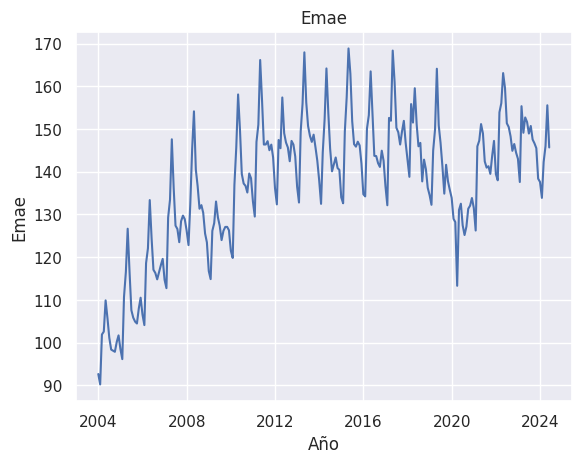

In [ ]:
#Grafico de la Serie
graficar(emae['Emae'])

<Axes: title={'center': 'Emae'}, xlabel='Año', ylabel='Emae'>

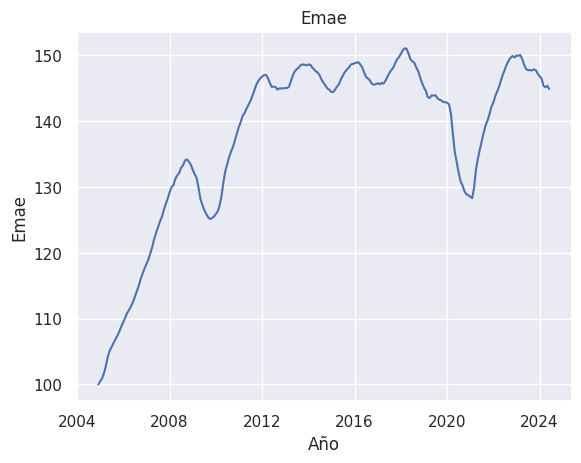

In [ ]:
#Grafico de Media Movil
graficar(emae['Emae'].rolling(window=12).mean())

<Axes: title={'center': 'Emae'}, xlabel='Año', ylabel='Emae'>

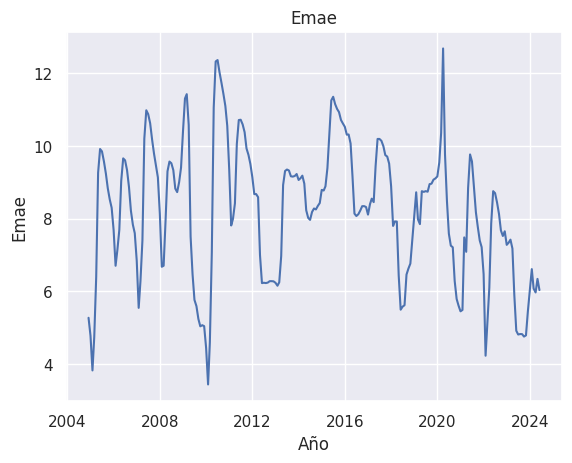

In [ ]:
#Grafico de desvio estandard movil
graficar(emae['Emae'].rolling(window=12).std())

**Respuesta 1: Es estacionaria esta serie?** No es estacionaria ya que en el grafico podemos ver que la media de la serie aumenta con el tiempo( solo tiene una disminucion para el año 2020 pero luego retoma la tendencia).Su media movil observada en el grafico cambia con el tiempo por lo que indica que no es estacionaria.Al observar el grafico de la desviacion estandar movil podems inferir que la volatilidad de la serie no es constante. Hay un aumento entre los años 2008-2009 y 2020( crisis del 2008, covid-2020).La volatilidad cambia a lo largo del tiempo , lo que implica que la desviacion estandar no es constante y por lo tanto no es estacionaria.

Pregunta 2: Las funciones de autocorrelación (FAC) y autocorrelación parcial (FAP) muestran el grado de vinculación del valor actual respecto de los valores pasados. Graficar. ¿Por qué sobresalen algunos elementos de la FAP?


Ayuda:

```
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(emae['Emae'], lags=30)
plt.show()
```

Más ayuda:

```
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(emae['Emae'], lags=30)
plt.show()
```






**Desarollo pregunta 2**

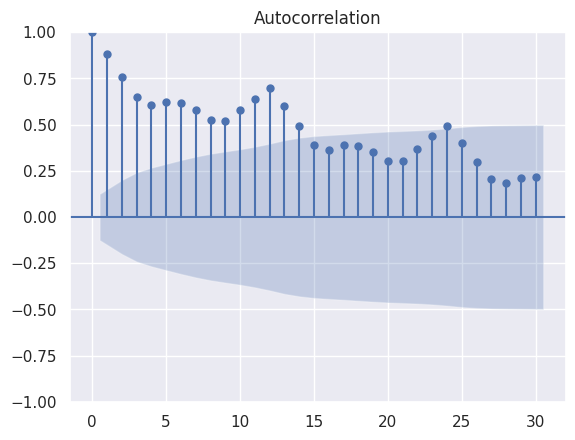

In [ ]:
#uncion  de autocorrelación (FAC)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(emae['Emae'], lags=30)
plt.show()

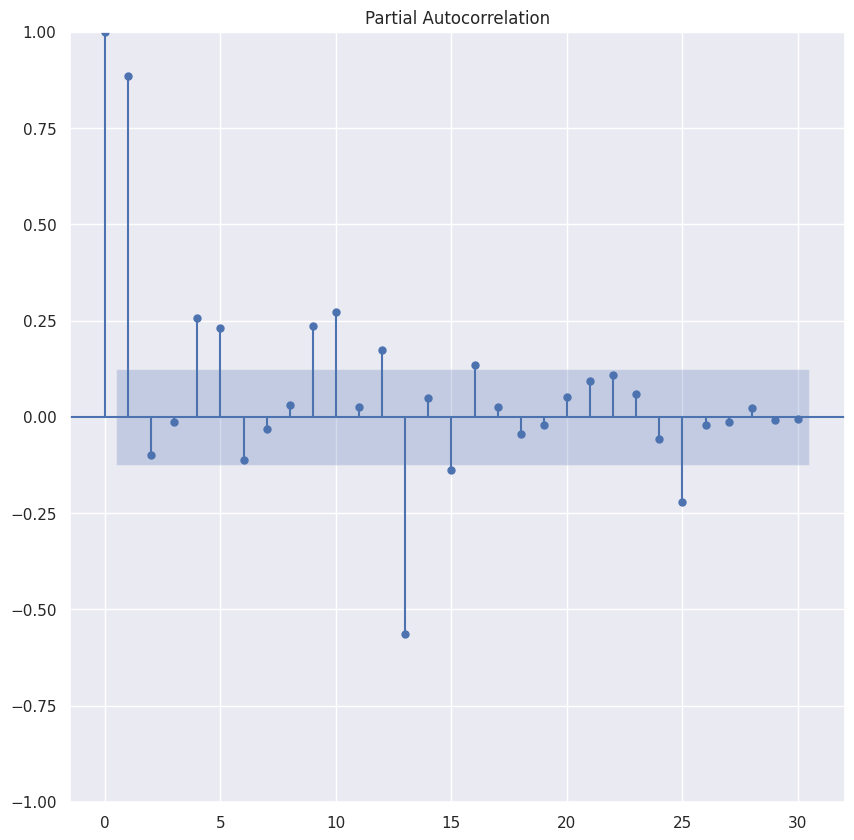

In [ ]:
#Autocorrelación parcial (FAP)
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(emae['Emae'], lags=30)
plt.show()


**Respuesta pregunta 2**:

***Apunte teorico de las funciones de correlacion***:

1) FAC (Función de Autocorrelación):

¿Qué mide? La correlación entre una serie temporal y una versión desplazada de sí misma. Si  comparamos la serie del EMAE de hoy con la de hace un mes, dos meses, etc. La FAC  dice qué tan relacionadas están.
En el gráfico: Se ve  que las barras decaen lentamente. Esto indica que los valores del EMAE están muy relacionados con sus valores pasados, incluso a varios meses de distancia.Significa que hay "memoria en la serie"



2) FAP (Función de Autocorrelación Parcial):

¿Qué mide? La correlación entre una serie temporal y una versión desplazada de sí misma, pero eliminando la influencia de los puntos intermedios. Es como si te preguntaras: "¿Cuánto influye el EMAE de hace dos meses en el de hoy, sin contar el del mes pasado?".
En el gráfico: Observas que solo las primeras barras son significativas (sobresalen de la zona azul). Esto sugiere que el EMAE de hoy se ve afectado por el de los últimos meses, pero la influencia de meses más lejanos es menor.

***Respuesta pregunta 2:***¿Por qué sobresalen algunos elementos de la FAP?

Los elementos que sobresalen en la FAP indican los rezagos (retrasos) que tienen una influencia directa en el valor actual de la serie. En el gráfico, se ve que los primeros rezagos son importantes, lo que significa que los valores del EMAE de los meses anteriores tienen un impacto directo en el valor actual.

En resumen:

La FAC  da una idea general de la memoria de la serie.
La FAP  ayuda a identificar los rezagos más importantes para modelar la serie.

Pregunta 3: ¿Qué pasó en 2008 y 2020?


Ayuda:



```
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = (10,10)
decomposition=seasonal_decompose(emae)

original=decomposition.observed
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(original, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Estacional')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()
```



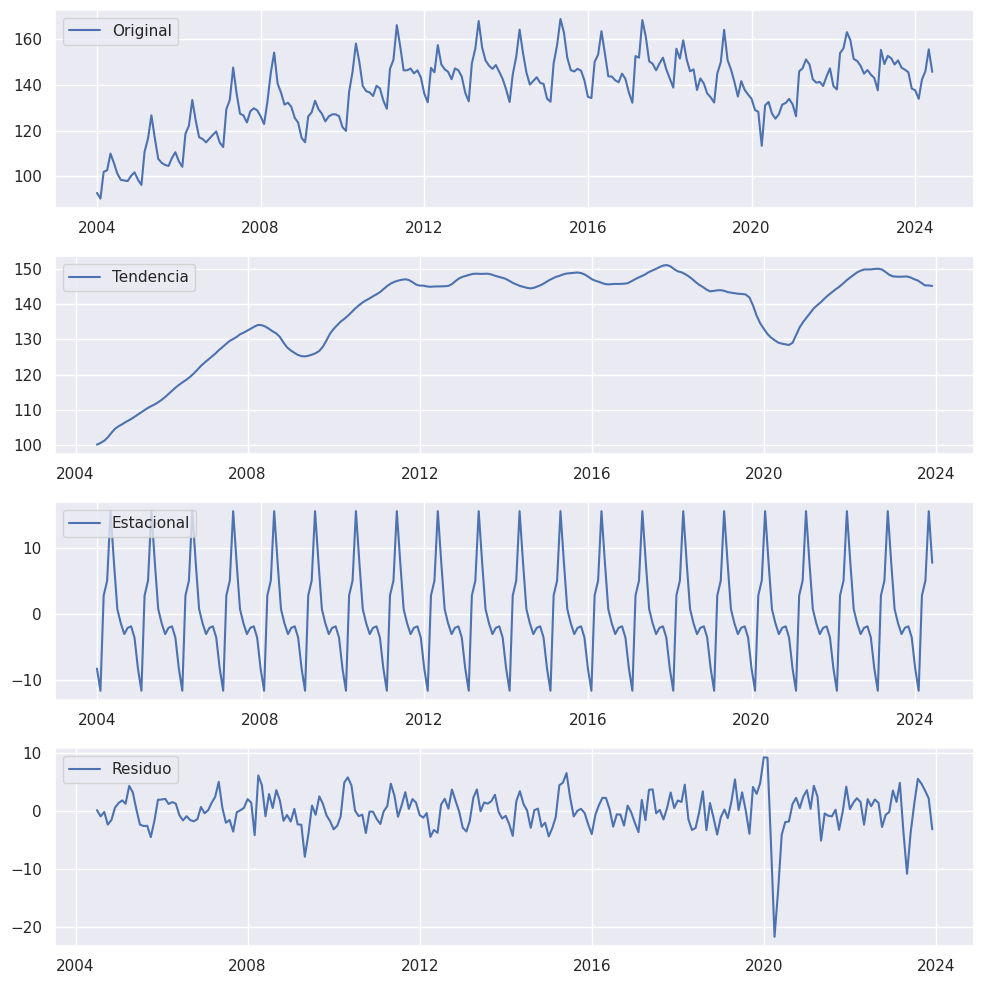

In [ ]:
#Desarrollo pregunta 3
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = (10,10)
decomposition = seasonal_decompose(emae['Emae'])

original=decomposition.observed
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(original, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Estacional')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


**Respuesta 3:** Se observa  una caída abrupta en 2008 y otra en 2020. Estas caídas reflejan las crisis que afectaron la economía argentina y global tanto por la crisis de USA en 2008(hipotecas) y 2020 (covid19) tal cual se detalló anteriormente.

El gráfico de residuos sirve para analizar estas crisis. Los residuos representan la diferencia entre el valor real de la serie y el valor predicho por el modelo de descomposición. En 2008 y 2020, los residuos se disparan hacia abajo, indicando que la caída de la actividad económica fue mucho mayor de lo que se esperaba según la tendencia y la estacionalidad. Tanto 2008 como 2020 fueron años de crisis que generaron fuertes caídas en el EMAE, reflejando la vulnerabilidad de la economía argentina a shocks externos e internos

Pregunta 4: ¿Qué son las otras columnas de nuestro Data Set?

Ayuda:



```
emae.columns
```

Más ayuda: [EMAE - INDEC](https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-9-48)

**Respuesta 4**

In [ ]:
emae.columns

Index(['Country', 'Emae', 'Emae - sa_orig', 'Tendencia-Ciclo',
       'A -  Agricultura, ganaderia, caza y silvicultura', 'B - Pesca',
       'C - Explotacion de minas y canteras', 'D - Industria manufacturera',
       'E - Electricidad, gas y agua', 'F - Construccion',
       'G - Comercio mayorista, minorista y reparaciones',
       'H - Hoteles y restaurantes', 'I - Transporte y comunicaciones',
       'J - Intermediacion financiera',
       'K - Actividades inmob, empresariales y de alquiler',
       'L - Administracion publica y defensa; planes de seguridad social de afiliacion obligatoria',
       'M - Enseñanza', 'N - Servicios sociales y de salud',
       'O - Otras act. de servicios comunitarios, sociales y personales',
       'Impuestos netos de subsidios',
       'O - Otras act. de servicios comunitarios, sociales y personales - sa_MoM',
       'N - Servicios sociales y de salud - sa_MoM', 'M - Enseñanza - sa_MoM',
       'L - Administracion publica y defensa; planes de segu

Pregunta 5: ¿Tendría sentido armar un modelo que busque explicar el EMAE a partir de las otras columnas del Data Set?

Ayuda: No.

**Respuesta 5:** Cuando ejecutamos el codigo emae.columns observamos que las otras columnas del dataset corresponden al EMAE pero representado de manera diferente.O sea no hay variables independientes que me sirvan para armar otro modelo para la explicacion del EMAE